In [3]:
#importing libraries to be utilised in the case study

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns

In [241]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows if needed
pd.set_option('display.max_colwidth', None) # Show long text fully
pd.set_option('display.expand_frame_repr', False) # Prevent splitting of columns

In [4]:
# Loading Datasets

state_txn = pd.read_excel('phonepe_dataset.xlsx', sheet_name = 'State_Txn and Users')
state_txn_type = pd.read_excel('phonepe_dataset.xlsx', sheet_name = 'State_TxnSplit')
state_device_data = pd.read_excel('phonepe_dataset.xlsx', sheet_name = 'State_DeviceData')
district_txn = pd.read_excel('phonepe_dataset.xlsx', sheet_name = 'District_Txn and Users')
district_demo = pd.read_excel('phonepe_dataset.xlsx', sheet_name = 'District Demographics')

In [6]:
#printing top 5 rows of state_txn dataframe

state_txn.head()

,State,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,6658,1.463176e+07,2197.621091,6740,0
1,Andaman & Nicobar Islands,2018,2,11340,2.833854e+07,2498.989022,9405,0
2,Andaman & Nicobar Islands,2018,3,16265,5.555747e+07,3415.768284,12149,0
3,Andaman & Nicobar Islands,2018,4,23758,9.054834e+07,3811.277720,15222,0
4,Andaman & Nicobar Islands,2019,1,30486,1.022997e+08,3355.630147,18596,0


In [7]:
#printing bottom 10 rows of state_txn_type dataframe

state_txn_type.tail(10)

,State,Year,Quarter,Transaction Type,Transactions,Amount (INR),ATV (INR)
2504,West Bengal,2021,1,Peer-to-peer payments,53869075,2.022402e+11,3754.292226
2505,West Bengal,2021,1,Merchant payments,37143701,2.891834e+10,778.553104
2506,West Bengal,2021,1,Recharge & bill payments,26673733,1.133967e+10,425.124820
2507,West Bengal,2021,1,Financial Services,166727,1.754458e+08,1052.293941
2508,West Bengal,2021,1,Others,400816,2.635025e+08,657.415236
2509,West Bengal,2021,2,Peer-to-peer payments,64661051,2.308123e+11,3569.572026
2510,West Bengal,2021,2,Merchant payments,41696787,3.478787e+10,834.305703
2511,West Bengal,2021,2,Recharge & bill payments,34799709,1.333145e+10,383.090958
2512,West Bengal,2021,2,Financial Services,190537,1.864665e+08,978.636630
2513,West Bengal,2021,2,Others,549353,3.167447e+08,576.577748


In [249]:
#printing middle 10 rows of state_device_data dataframe

num_rows = len(state_device_data)
start = (num_rows - 10) // 2
end = start + 10
middle_rows = state_device_data.iloc[start:end]
print(middle_rows)

            State  Year  Quarter     Brand  Registered Users  Percentage
2767       Ladakh  2021        2   OnePlus              1741    0.023198
2768       Ladakh  2021        2  Motorola               922    0.012285
2769       Ladakh  2021        2    Huawei               894    0.011912
2770       Ladakh  2021        2    Lenovo               490    0.006529
2771       Ladakh  2021        2    Others              2610    0.034778
2772  Lakshadweep  2018        1   Samsung               102    0.203593
2773  Lakshadweep  2018        1    Xiaomi               100    0.199601
2774  Lakshadweep  2018        1      Vivo                67    0.133733
2775  Lakshadweep  2018        1      Oppo                56    0.111776
2776  Lakshadweep  2018        1    Huawei                25    0.049900


In [251]:
#printing top 10 rows of district_txn dataframe

district_txn.head(10)

,State,Year,Quarter,District,Code,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,Nicobars,AN01,528,1.139849e+06,2158.804548,262,0
1,Andaman & Nicobar Islands,2018,1,North And Middle Andaman,AN02,442,9.316631e+05,2107.835016,632,0
2,Andaman & Nicobar Islands,2018,1,South Andaman,AN03,5688,1.256025e+07,2208.201361,5846,0
3,Andaman & Nicobar Islands,2018,2,Nicobars,AN01,1120,3.072437e+06,2743.247239,351,0
4,Andaman & Nicobar Islands,2018,2,North And Middle Andaman,AN02,825,1.317863e+06,1597.409798,911,0
5,Andaman & Nicobar Islands,2018,2,South Andaman,AN03,9395,2.394824e+07,2549.040502,8143,0
6,Andaman & Nicobar Islands,2018,3,Nicobars,AN01,1471,6.387829e+06,4342.507921,467,0
7,Andaman & Nicobar Islands,2018,3,North And Middle Andaman,AN02,1283,4.901530e+06,3820.365954,1208,0
8,Andaman & Nicobar Islands,2018,3,South Andaman,AN03,13511,4.426811e+07,3276.449742,10474,0
9,Andaman & Nicobar Islands,2018,4,Nicobars,AN01,1485,7.180859e+06,4835.595525,536,0


In [253]:
#printing bottom 10 rows of district_txn dataframe

district_txn.tail(10)

,State,Year,Quarter,District,Code,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
10238,West Bengal,2021,2,Murshidabad,WB14,8602251,1.999694e+10,2324.616616,1248602,16530655
10239,West Bengal,2021,2,Nadia,WB15,5524174,1.122758e+10,2032.445525,955428,13665885
10240,West Bengal,2021,2,North Twenty Four Parganas,WB16,17258291,3.041482e+10,1762.331031,2660664,37899453
10241,West Bengal,2021,2,Paschim Bardhaman,WB17,4893774,8.731263e+09,1784.157359,789026,10545670
10242,West Bengal,2021,2,Paschim Medinipur,WB18,5051834,1.030351e+10,2039.558976,856640,16201033
10243,West Bengal,2021,2,Purba Bardhaman,WB19,3920729,7.572502e+09,1931.401639,787970,12128849
10244,West Bengal,2021,2,Purba Medinipur,WB20,6418522,1.515507e+10,2361.146027,946277,15491958
10245,West Bengal,2021,2,Purulia,WB21,1895981,2.790996e+09,1472.059252,435131,8843358
10246,West Bengal,2021,2,South Twenty Four Parganas,WB22,6661813,1.339853e+10,2011.243709,1286588,19344293
10247,West Bengal,2021,2,Uttar Dinajpur,WB23,2253385,5.564221e+09,2469.272118,392388,8184990


In [255]:
#printing every 10th row of state_demo dataframe

district_demo.iloc[::10]

,State,District,Headquarters,Population,Area (sq km),Density,Code,Alternate Name
0,Andhra Pradesh,Anantapur,Anantapur,4083315,19130.00,213,AP01,Anantapur
10,Andhra Pradesh,Visakhapatnam,Visakhapatnam,4288113,11161.00,384,AP10,Visakhapatnam
20,Arunachal Pradesh,Lepa Rada,Basar,0,0.00,0,AR08,Lepa Rada
30,Arunachal Pradesh,Siang,Pangin,31920,2919.00,11,AR18,Siang
40,Assam,Barpeta,Barpeta,1693622,3245.00,520,AS03,Barpeta
50,Assam,Dima Hasao,Haflong,213529,4888.00,44,AS13,Dima Hasao
60,Assam,Kokrajhar,Kokrajhar,886999,3129.00,283,AS23,Kokrajhar
70,Assam,Udalguri,Udalguri,832769,1676.00,497,AS33,Udalguri
80,Bihar,Darbhanga,Darbhanga,3921971,2278.00,1721,BR09,Darbhanga
90,Bihar,Lakhisarai,Lakhisarai,1000717,1229.00,815,BR19,Lakhisarai


In [257]:
##Checking summary statistics of each datasets

In [259]:
state_txn.describe()

,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
count,504.000000,504.000000,5.040000e+02,5.030000e+02,504.000000,5.040000e+02,5.040000e+02
mean,2019.285714,2.357143,4.074000e+07,7.083332e+10,1993.471543,4.777501e+06,9.774471e+07
std,1.031181,1.109971,8.228714e+07,1.440902e+11,607.464894,6.644496e+06,2.042376e+08
min,2018.000000,1.000000,7.780000e+02,1.928611e+06,0.000000,5.010000e+02,0.000000e+00
25%,2018.000000,1.000000,5.925578e+05,1.167157e+09,1598.910667,1.574202e+05,0.000000e+00
50%,2019.000000,2.000000,6.217487e+06,1.051605e+10,1861.380589,1.747914e+06,2.930574e+06
75%,2020.000000,3.000000,4.363675e+07,6.947045e+10,2259.087924,7.320945e+06,8.615022e+07
max,2021.000000,4.000000,5.736165e+08,1.027958e+12,3938.733850,3.966470e+07,1.208084e+09


In [261]:
state_txn_type.describe()

,Year,Quarter,Transactions,Amount (INR),ATV (INR)
count,2514.000000,2514.000000,2.514000e+03,2.514000e+03,2514.000000
mean,2019.286794,2.358393,8.167446e+06,1.443978e+10,1349.927929
std,1.030807,1.109251,2.423645e+07,5.995054e+10,1534.866221
min,2018.000000,1.000000,2.000000e+00,3.439721e+01,17.198606
25%,2018.000000,1.000000,2.788075e+04,1.762412e+07,385.735827
50%,2019.000000,2.000000,2.687980e+05,1.901189e+08,720.940406
75%,2020.000000,3.000000,3.683230e+06,2.661248e+09,1352.790116
max,2021.000000,4.000000,2.795990e+08,8.721520e+11,7767.539936


In [263]:
state_device_data.describe()

,Year,Quarter,Registered Users,Percentage
count,5544.000000,5544.000000,5.544000e+03,5544.000000
mean,2019.285714,2.357143,4.343183e+05,0.090909
std,1.030250,1.108970,9.056069e+05,0.083095
min,2018.000000,1.000000,1.000000e+01,0.006373
25%,2018.000000,1.000000,8.055750e+03,0.021588
50%,2019.000000,2.000000,7.442250e+04,0.056914
75%,2020.000000,3.000000,3.978875e+05,0.143626
max,2021.000000,4.000000,9.764252e+06,0.478367


In [265]:
district_txn.describe()

,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
count,10248.000000,10248.000000,1.024800e+04,1.024800e+04,10244.000000,1.024800e+04,1.024800e+04
mean,2019.285714,2.357143,2.003607e+06,3.542311e+09,1909.796545,2.349591e+05,4.807117e+06
std,1.030208,1.108924,9.613466e+06,1.473154e+10,600.943349,4.605978e+05,1.562541e+07
min,2018.000000,1.000000,0.000000e+00,0.000000e+00,84.944283,2.200000e+01,0.000000e+00
25%,2018.000000,1.000000,1.031418e+05,1.756668e+08,1554.589051,3.619550e+04,0.000000e+00
50%,2019.000000,2.000000,3.763065e+05,6.784562e+08,1863.135530,1.067640e+05,6.403025e+05
75%,2020.000000,3.000000,1.272815e+06,2.377256e+09,2203.083552,2.573165e+05,4.346320e+06
max,2021.000000,4.000000,3.487128e+08,4.444224e+11,11209.980550,1.060461e+07,5.544197e+08


In [267]:
district_demo.describe()

,Population,Area (sq km),Density
count,7.420000e+02,742.000000,742.000000
mean,1.668555e+06,4395.373120,838.512129
std,1.458849e+06,4254.676124,2754.406896
min,0.000000e+00,0.000000,0.000000
25%,6.530815e+05,2039.750000,198.000000
50%,1.322359e+06,3402.500000,353.000000
75%,2.297440e+06,5432.750000,686.250000
max,1.008285e+07,45652.000000,36155.000000


In [269]:
##Checking data types of columns in all datasets

In [271]:
state_txn.dtypes

State                object
Year                  int64
Quarter               int64
Transactions          int64
Amount (INR)        float64
ATV (INR)           float64
Registered Users      int64
App Opens             int64
dtype: object

In [273]:
state_txn_type.dtypes

State                object
Year                  int64
Quarter               int64
Transaction Type     object
Transactions          int64
Amount (INR)        float64
ATV (INR)           float64
dtype: object

In [275]:
state_device_data.dtypes

State                object
Year                  int64
Quarter               int64
Brand                object
Registered Users      int64
Percentage          float64
dtype: object

In [277]:
district_txn.dtypes

State                object
Year                  int64
Quarter               int64
District             object
Code                 object
Transactions          int64
Amount (INR)        float64
ATV (INR)           float64
Registered Users      int64
App Opens             int64
dtype: object

In [279]:
district_demo.dtypes

State              object
District           object
Headquarters       object
Population          int64
Area (sq km)      float64
Density             int64
Code               object
Alternate Name     object
dtype: object

In [281]:
##Identifying missing values

In [283]:
print(state_txn.isnull().mean().idxmax(), "\n\n", state_txn.isnull().mean())

Amount (INR) 

 State               0.000000
Year                0.000000
Quarter             0.000000
Transactions        0.000000
Amount (INR)        0.001984
ATV (INR)           0.000000
Registered Users    0.000000
App Opens           0.000000
dtype: float64


In [285]:
missing_state_txn = pd.DataFrame(state_txn.isnull().sum())

In [287]:
missing_state_txn['Missing%'] = missing_state_txn[0]/len(state_txn)
missing_state_txn.sort_values(by='Missing%', ascending = False, inplace = True)
missing_state_txn

,0,Missing%
Amount (INR),1,0.001984
State,0,0.000000
Year,0,0.000000
Quarter,0,0.000000
Transactions,0,0.000000
ATV (INR),0,0.000000
Registered Users,0,0.000000
App Opens,0,0.000000


In [289]:
state_txn_type.isnull().sum()

State               0
Year                0
Quarter             0
Transaction Type    0
Transactions        0
Amount (INR)        0
ATV (INR)           0
dtype: int64

In [291]:
state_device_data.isnull().sum()

State               0
Year                0
Quarter             0
Brand               0
Registered Users    0
Percentage          0
dtype: int64

In [293]:
missing_district_txn = pd.DataFrame(district_txn.isnull().sum())
missing_district_txn.columns = ['#Missing']
missing_district_txn['Missing%'] = missing_district_txn['#Missing']/len(district_txn)
missing_district_txn.sort_values(by='Missing%', ascending = False, inplace = True)
missing_district_txn

,#Missing,Missing%
Code,28,0.002732
ATV (INR),4,0.000390
State,0,0.000000
Year,0,0.000000
Quarter,0,0.000000
District,0,0.000000
Transactions,0,0.000000
Amount (INR),0,0.000000
Registered Users,0,0.000000
App Opens,0,0.000000


In [295]:
district_demo.isnull().sum()

State             0
District          0
Headquarters      0
Population        0
Area (sq km)      0
Density           0
Code              0
Alternate Name    0
dtype: int64

In [297]:
state_txn.shape

(504, 8)

In [299]:
##Finding total number of states and districts

state = state_txn['State'].unique()
len(state)

36

In [301]:
district = district_txn['District'].unique()
len(district)

723

In [303]:
##Identifying number of districts in each state

state_district = pd.DataFrame(district_txn['State'])
state_district['District'] = district_txn['District']
district_counts = state_district.groupby('State')['District'].nunique().sort_values(ascending = False)
district_counts 

State
Uttar Pradesh                           75
Madhya Pradesh                          52
Bihar                                   38
Tamil Nadu                              37
Maharashtra                             36
Assam                                   33
Rajasthan                               33
Gujarat                                 33
Telangana                               33
Karnataka                               30
Odisha                                  30
Chhattisgarh                            27
Arunachal Pradesh                       25
Jharkhand                               24
West Bengal                             23
Jammu & Kashmir                         22
Haryana                                 22
Punjab                                  22
Manipur                                 16
Kerala                                  14
Andhra Pradesh                          13
Uttarakhand                             13
Himachal Pradesh                        12
Megha

In [305]:
print(district_txn['State'].value_counts().idxmax())

Uttar Pradesh


In [307]:
##Calculating total number of transactions and total amount of transactions over the years

total_transactions = state_txn.groupby('State').agg(
    total_transaction_count=('Transactions', 'sum'),
    total_transaction_amount=('Amount (INR)', 'sum')
).reset_index()

In [309]:
##Top 5 States with highest transaction amount

total_transactions.sort_values(by='total_transaction_amount', ascending = False).head(5)

,State,total_transaction_count,total_transaction_amount
31,Telangana,2347430243,4.574246e+12
15,Karnataka,2981044533,4.361396e+12
20,Maharashtra,2833670154,4.290995e+12
1,Andhra Pradesh,1781091169,3.187847e+12
28,Rajasthan,1382918930,2.625584e+12


In [311]:
##Top 5 States with lowest transaction amount

total_transactions.sort_values(by='total_transaction_amount', ascending = True).head(5)

,State,total_transaction_count,total_transaction_amount
18,Lakshadweep,71610,1.921587e+08
0,Andaman & Nicobar Islands,1223565,3.641818e+09
23,Mizoram,2162776,6.317141e+09
17,Ladakh,1880109,6.606978e+09
22,Meghalaya,5648913,1.254162e+10


In [313]:
##State and Quarter wise top transaction type

transaction_type = state_txn_type.groupby(['State','Quarter','Transaction Type']).agg(
    Transactions=('Transactions', 'sum')
).reset_index()
transaction_type = transaction_type.loc[transaction_type.groupby(['State','Quarter'])['Transactions'].idxmax(),['State','Quarter','Transaction Type','Transactions']]
transaction_type

,State,Quarter,Transaction Type,Transactions
3,Andaman & Nicobar Islands,1,Peer-to-peer payments,138772
9,Andaman & Nicobar Islands,2,Recharge & bill payments,180447
14,Andaman & Nicobar Islands,3,Recharge & bill payments,84165
18,Andaman & Nicobar Islands,4,Peer-to-peer payments,110018
23,Andhra Pradesh,1,Peer-to-peer payments,255236515
28,Andhra Pradesh,2,Peer-to-peer payments,300464202
33,Andhra Pradesh,3,Peer-to-peer payments,161944976
38,Andhra Pradesh,4,Peer-to-peer payments,226765388
44,Arunachal Pradesh,1,Recharge & bill payments,930515
49,Arunachal Pradesh,2,Recharge & bill payments,1261863


In [315]:
##Identifying device brand with highest registered users in each state

biggest_brands = pd.DataFrame(state_device_data.groupby(['State','Brand'])['Registered Users'].sum()).reset_index()

In [317]:
biggest_brands

,State,Brand,Registered Users
0,Andaman & Nicobar Islands,Apple,9334
1,Andaman & Nicobar Islands,Huawei,11497
2,Andaman & Nicobar Islands,Lenovo,5362
3,Andaman & Nicobar Islands,Motorola,9491
4,Andaman & Nicobar Islands,OnePlus,15397
5,Andaman & Nicobar Islands,Oppo,36007
6,Andaman & Nicobar Islands,Others,33630
7,Andaman & Nicobar Islands,Realme,22546
8,Andaman & Nicobar Islands,Samsung,77065
9,Andaman & Nicobar Islands,Tecno,1770


In [319]:
biggest_brands.loc[biggest_brands.groupby('State')['Registered Users'].idxmax()]

,State,Brand,Registered Users
11,Andaman & Nicobar Islands,Xiaomi,97889
22,Andhra Pradesh,Xiaomi,40061549
34,Arunachal Pradesh,Xiaomi,437803
46,Assam,Xiaomi,6979357
60,Bihar,Xiaomi,33721314
73,Chandigarh,Xiaomi,896628
85,Chhattisgarh,Xiaomi,8763373
98,Dadra & Nagar Haveli and Daman & Diu,Xiaomi,638834
109,Delhi,Xiaomi,24114984
120,Goa,Xiaomi,1208672


In [321]:
##Identifying districts with highest population

highest_population = pd.DataFrame(district_demo.groupby(['State','District'])['Population'].sum()).reset_index()

In [323]:
highest_population = highest_population.loc[highest_population.groupby('State')['Population'].idxmax()].sort_values(by='Population', ascending = False)

In [325]:
highest_population

,State,District,Population
734,West Bengal,North 24 Parganas,10082852
272,Karnataka,Bangalore Urban,9588910
397,Maharashtra,Pune,9426959
158,Gujarat,Ahmedabad,7208200
554,Tamil Nadu,Chennai,7139882
530,Rajasthan,Jaipur,6663971
633,Uttar Pradesh,Allahabad,5959798
100,Bihar,Patna,5772804
5,Andhra Pradesh,East Godavari,5151549
308,Kerala,Malappuram,4110956


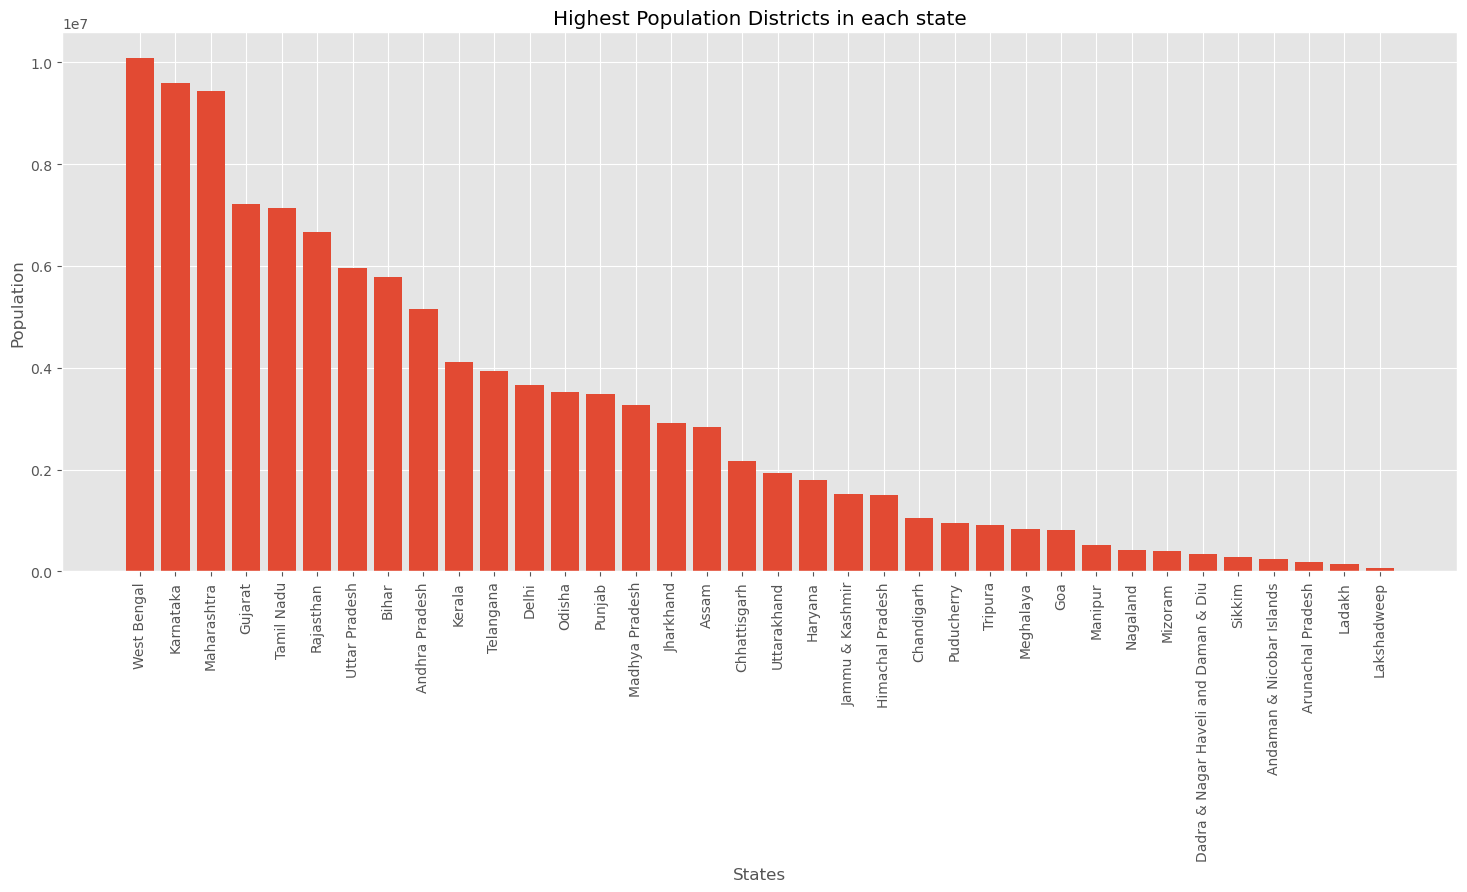

In [327]:
plt.style.use('ggplot')
plt.figure(figsize = (18,7))
plt.bar(highest_population['State'], highest_population['Population'])
plt.title("Highest Population Districts in each state")
plt.xlabel("States")
plt.ylabel("Population")
plt.xticks(rotation= 90)
plt.show()

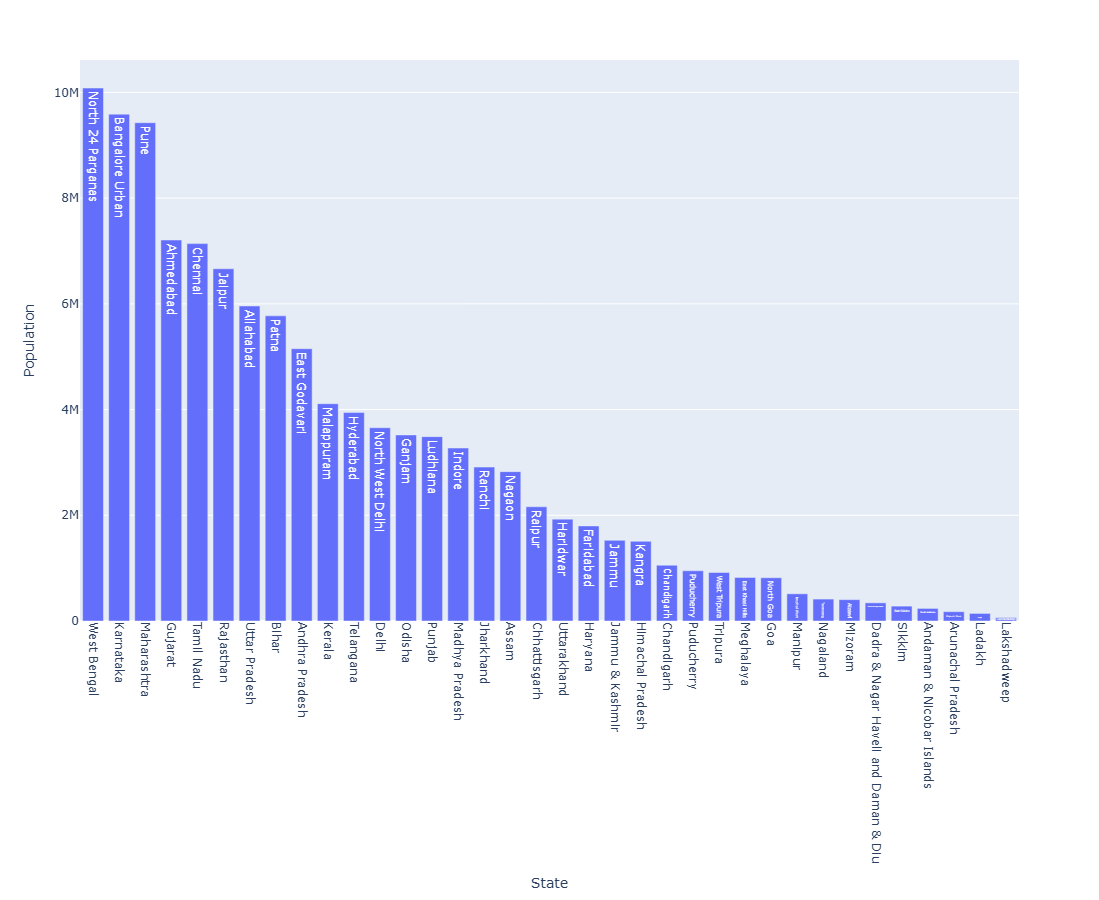

In [329]:
fig = px.bar(highest_population, x='State', y='Population', text='District')
fig.update_traces(textposition='inside', textfont_size=12)
fig.update_layout(xaxis_tickangle=90, width=1000, height=900)
fig.show()

In [331]:
##Finding top 5 highest average transaction value states

avg_transaction = pd.DataFrame(state_txn.groupby('State')['ATV (INR)'].mean()).reset_index()
avg_transaction.sort_values(by = 'ATV (INR)', ascending = False).head(5)

,State,ATV (INR)
17,Ladakh,3408.222984
0,Andaman & Nicobar Islands,3159.266422
23,Mizoram,2927.517802
18,Lakshadweep,2776.118701
2,Arunachal Pradesh,2638.323985


In [333]:
state_txn.groupby('State').agg({'ATV (INR)': 'mean'}).sort_values(by='ATV (INR)', ascending = False).head(5)

,ATV (INR)
State,
Ladakh,3408.222984
Andaman & Nicobar Islands,3159.266422
Mizoram,2927.517802
Lakshadweep,2776.118701
Arunachal Pradesh,2638.323985


In [335]:
##Finding top 5 lowest average transaction value states

avg_transaction.sort_values(by = 'ATV (INR)', ascending = True).head(5)

,State,ATV (INR)
35,West Bengal,1373.600590
25,Odisha,1428.137367
7,Dadra & Nagar Haveli and Daman & Diu,1487.395599
20,Maharashtra,1516.361820
15,Karnataka,1517.392249


In [337]:
##App Usage over the Years

app_opens = state_txn.groupby(['Year','Quarter','State'])['App Opens'].sum()
app_opens

Year  Quarter  State                               
2018  1        Andaman & Nicobar Islands                        0
               Andhra Pradesh                                   0
               Arunachal Pradesh                                0
               Assam                                            0
               Bihar                                            0
               Chandigarh                                       0
               Chhattisgarh                                     0
               Dadra & Nagar Haveli and Daman & Diu             0
               Delhi                                            0
               Goa                                              0
               Gujarat                                          0
               Haryana                                          0
               Himachal Pradesh                                 0
               Jammu & Kashmir                                  0
               Jharkhand

In [339]:
up_txn = state_txn[state_txn['State']=='Uttar Pradesh']
up_txn = pd.DataFrame(up_txn.groupby('Year')['App Opens'].sum()).reset_index()

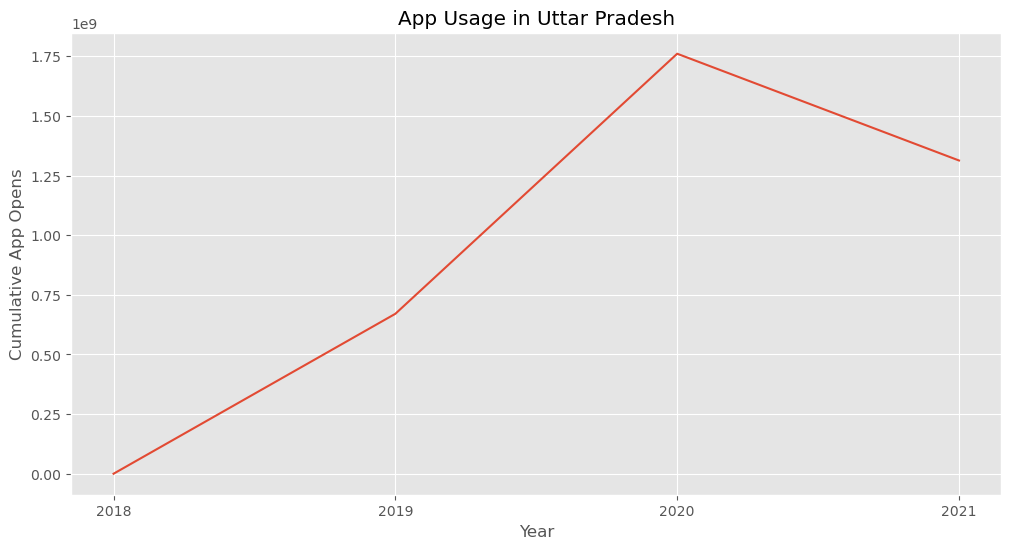

In [341]:
plt.figure(figsize = (12,6))
plt.plot(up_txn['Year'].astype(str),up_txn['App Opens'])
plt.title("App Usage in Uttar Pradesh")
plt.xlabel("Year")
plt.ylabel("Cumulative App Opens")
plt.show()

In [343]:
##State-wise Transaction Types Distribution

latest_year = state_txn_type['Year'].max()
latest_quarter_data = state_txn_type[(state_txn_type['Year']==latest_year) & (state_txn_type['Quarter']==2)]
latest_quarter_data = pd.DataFrame(latest_quarter_data.groupby(['State','Transaction Type'])['Transactions'].sum()).reset_index()
df_pivot = latest_quarter_data.pivot(index='State', columns='Transaction Type', values='Transactions')

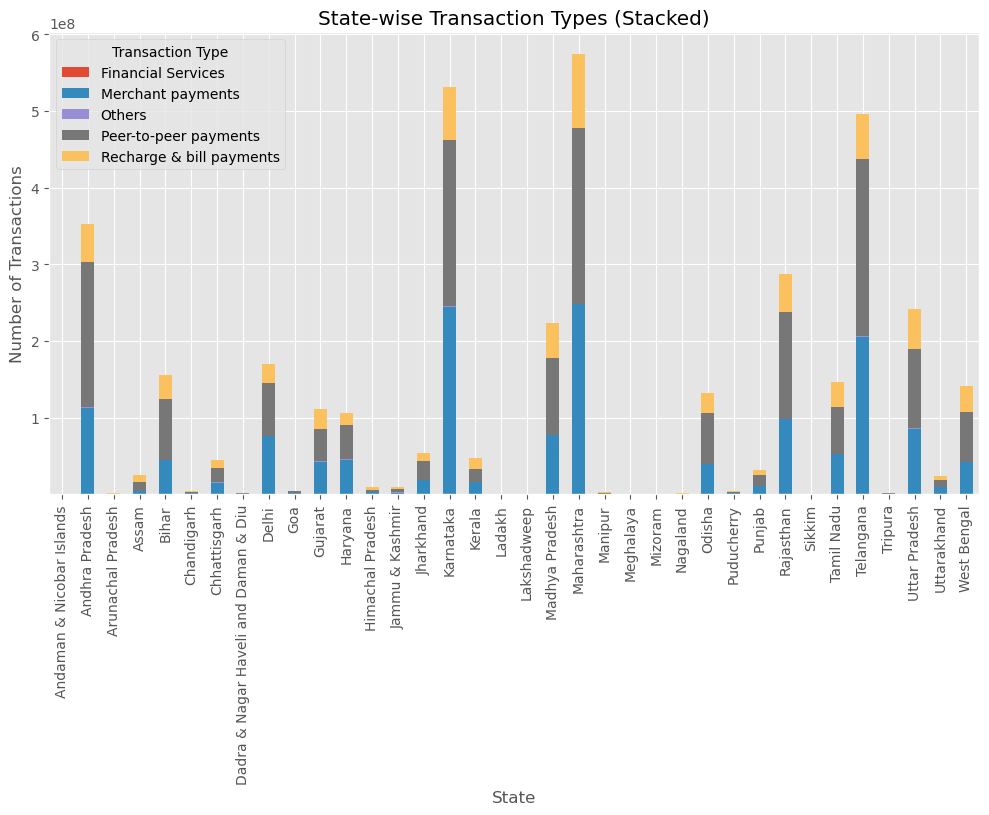

In [345]:
df_pivot.plot(kind='bar', stacked=True, figsize=(12,6))
plt.style.use("ggplot")
plt.ylabel("Number of Transactions")
plt.xlabel("State")
plt.title("State-wise Transaction Types (Stacked)")
plt.legend(title="Transaction Type", loc='best')
plt.xticks(rotation=90)
plt.show()

In [347]:
#Identifying unique ditrict mapping and saving in CSV file

unique_mapping = pd.DataFrame(district_txn[['District','Code']])

In [349]:
unique_mappings = unique_mapping.drop_duplicates()

In [351]:
unique_mappings.to_csv('unique_mappings.csv', index = False)

In [353]:
#Total transactions, amount, registered users by state

district_level_data = district_txn.groupby('State')[['Transactions','Amount (INR)','Registered Users']].sum().reset_index()
state_level_data = state_txn.groupby('State')[['Transactions','Amount (INR)','Registered Users']].sum().reset_index()

In [355]:
comparison_data = pd.merge(state_level_data, district_level_data, on = 'State', how = 'inner')

In [357]:
comparison_data[(comparison_data['Transactions_x']!=comparison_data['Transactions_y']) |
                (comparison_data['Amount (INR)_x']!=comparison_data['Amount (INR)_y']) |
                (comparison_data['Registered Users_x']!=comparison_data['Registered Users_y'])]

,State,Transactions_x,Amount (INR)_x,Registered Users_x,Transactions_y,Amount (INR)_y,Registered Users_y
0,Andaman & Nicobar Islands,1223565,3.641818e+09,408396,1223565,3.641818e+09,408396
1,Andhra Pradesh,1781091169,3.187847e+12,158007957,1781091169,3.860292e+12,158007957
2,Arunachal Pradesh,8043799,2.225183e+10,1862214,8043799,2.225183e+10,1862214
3,Assam,123577981,2.814087e+11,26860751,123577981,2.814087e+11,26860751
4,Bihar,713643889,1.639579e+12,115284760,713643889,1.639579e+12,115284760
5,Chandigarh,25516542,5.371208e+10,3801466,25516542,5.371208e+10,3801466
6,Chhattisgarh,241908549,4.156353e+11,37448388,241908549,4.156353e+11,37448388
7,Dadra & Nagar Haveli and Daman & Diu,12462185,1.865878e+10,2701112,12462185,1.865878e+10,2701112
8,Delhi,1011031124,1.649942e+12,95374654,1011031124,1.649942e+12,95374654
9,Goa,24481604,4.427187e+10,4755320,24481604,4.427187e+10,4755320


In [359]:
# Ratio of registered users to population of that state

population_data = district_demo.groupby('State').agg({'Population':'sum'})
registered_users_data = state_txn.groupby('State').agg({'Registered Users':'sum'})
merged_data = pd.merge(population_data,registered_users_data, on ='State')

In [361]:
merged_data['Users/Population Ratio'] = merged_data['Registered Users']/merged_data['Population']
merged_data = merged_data.sort_values(by = 'Users/Population Ratio', ascending = False).reset_index()

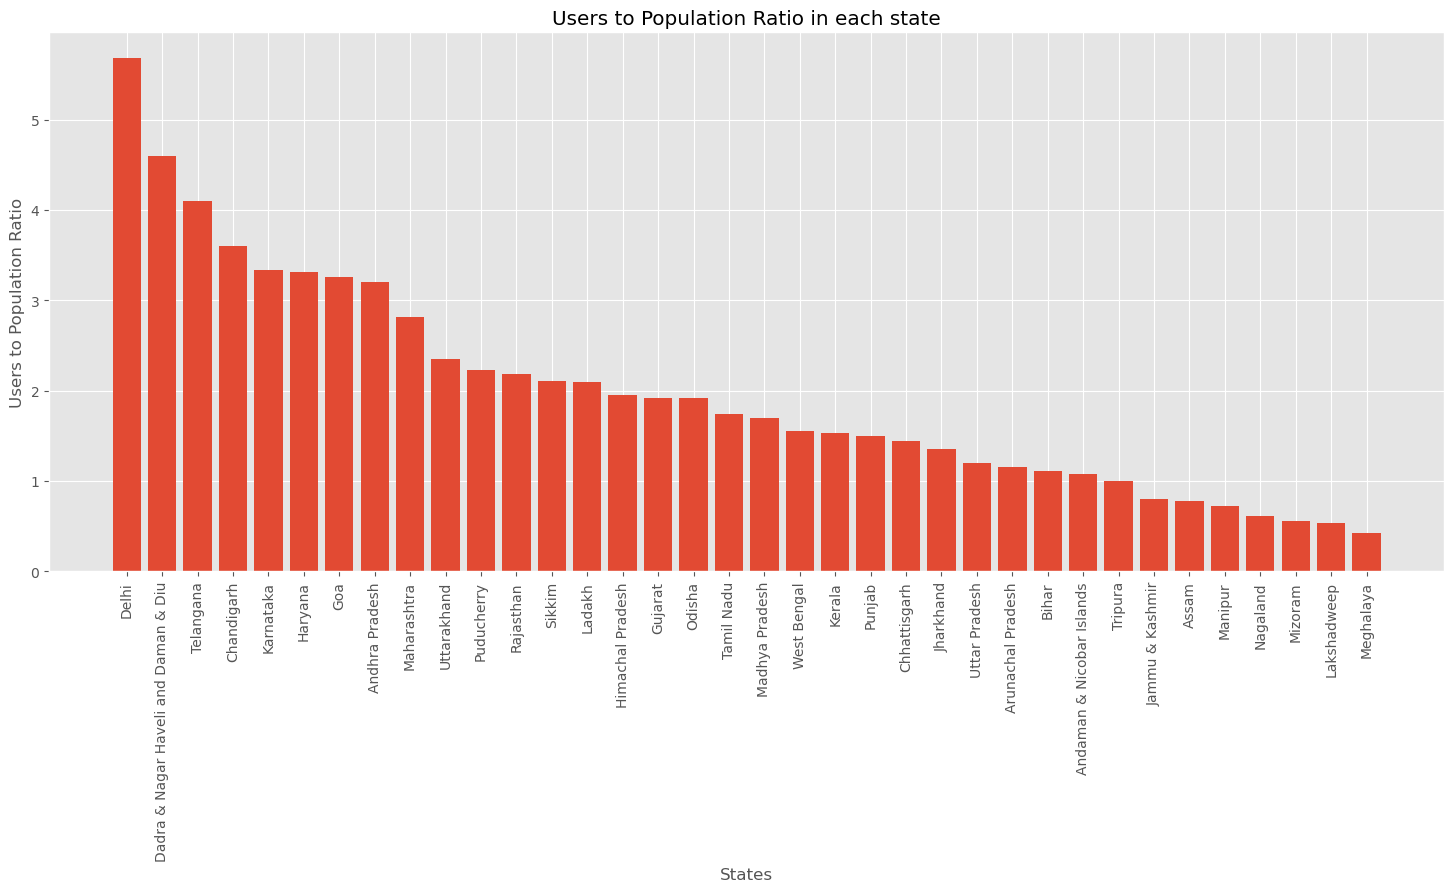

In [363]:
plt.style.use('ggplot')
plt.figure(figsize = (18,7))
plt.bar(merged_data['State'], merged_data['Users/Population Ratio'])
plt.title("Users to Population Ratio in each state")
plt.xlabel("States")
plt.ylabel("Users to Population Ratio")
plt.xticks(rotation= 90)
plt.show()

In [373]:
district_data = pd.merge(district_txn, district_demo, on = ['State','District','Code'], how = 'inner')

In [383]:
correlation = district_data['Transactions'].corr(district_data['Density'])
print("Correlation between transaction volumes and density: ", np.round(correlation*100,2), "%")

Correlation between transaction volumes and density:  30.77 %


In [391]:
district_data[['Density', 'Transactions']].corr()

,Density,Transactions
Density,1.000000,0.307704
Transactions,0.307704,1.000000


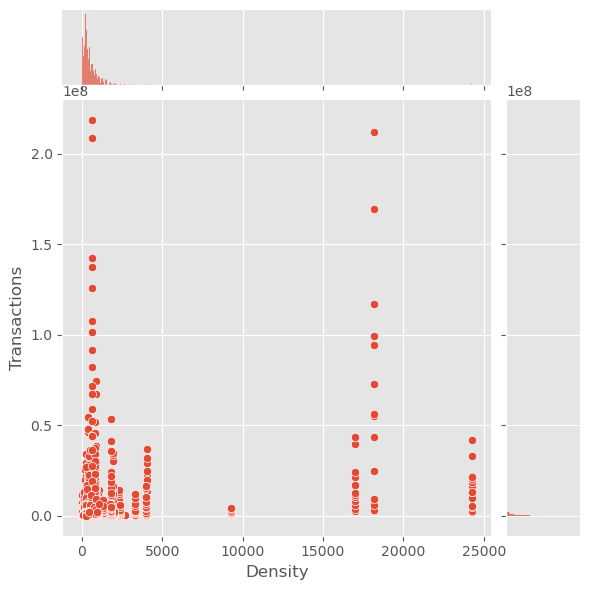

In [387]:
#Scatter plot to visualise relation between transactions volumes and density

sns.jointplot(x='Density', y = 'Transactions', data=district_data, kind = 'scatter')

<b>Observations from the Scatter Plot:</b>

Highly Skewed Distribution:
Most of the data points are clustered towards lower density values (left side of the x-axis).
This suggests that a majority of districts have low population density.

Sparse High-Density Areas:
There are a few districts with high density (>10,000 people per unit area), but these are not consistently associated with high transaction volumes.

Transaction Concentration in Low-Density Areas:
Many high transaction values appear even at low population densities.
This could mean that transaction volume is not strongly dependent on population density.

Potential Outliers:
Some points have extremely high transaction volumes (~200 million) despite relatively low density.
This could indicate commercial hubs or business districts where transaction volume is high despite a lower population.

In [470]:
#Identifying top and bottom 5 states based on average transaction amount per user

state_users_amount = state_txn.groupby('State').agg({'Amount (INR)':'sum'}).reset_index()

In [454]:
state_users_count = state_txn.groupby('State').agg({'Registered Users': 'sum'}).reset_index()

In [456]:
state_users = pd.merge(state_users_amount, state_users_count, on = 'State')

In [462]:
state_users['ATA per user'] = state_users['Amount (INR)']/state_users['Registered Users']
state_users.sort_values(by = 'ATA per user', ascending = False, inplace = True)

In [464]:
state_users.head(5)

,State,Amount (INR),Registered Users,ATA per user
31,Telangana,4.574246e+12,149224214,30653.509622
15,Karnataka,4.361396e+12,203098564,21474.282206
1,Andhra Pradesh,3.187847e+12,158007957,20175.233763
28,Rajasthan,2.625584e+12,149770064,17530.768707
8,Delhi,1.649942e+12,95374654,17299.587909


In [468]:
state_users.tail(5)

,State,Amount (INR),Registered Users,ATA per user
12,Himachal Pradesh,9.786546e+10,13373980,7317.601442
16,Kerala,3.729599e+11,51267042,7274.846690
7,Dadra & Nagar Haveli and Daman & Diu,1.865878e+10,2701112,6907.815954
32,Tripura,2.097051e+10,3661575,5727.184275
18,Lakshadweep,1.921587e+08,34223,5614.898889


In [17]:
#

state_device = pd.merge(state_txn, state_device_data, on = ['State','Year','Quarter'])

In [19]:
total_users = state_txn.groupby(['State']).agg({'Registered Users':'sum'}).reset_index()
brand_users = state_device.groupby(['State','Brand']).agg({'Registered Users_y':'sum'}).reset_index()
data = pd.merge(total_users, brand_users, on = 'State')
data['Usage%'] = np.round((data['Registered Users_y']/data['Registered Users'])*100,2)
data

,State,Registered Users,Brand,Registered Users_y,Usage%
0,Andaman & Nicobar Islands,408396,Apple,9334,2.29
1,Andaman & Nicobar Islands,408396,Huawei,11497,2.82
2,Andaman & Nicobar Islands,408396,Lenovo,5362,1.31
3,Andaman & Nicobar Islands,408396,Motorola,9491,2.32
4,Andaman & Nicobar Islands,408396,OnePlus,15397,3.77
...,...,...,...,...,...
443,West Bengal,144242183,Others,17526532,12.15
444,West Bengal,144242183,Realme,9322038,6.46
445,West Bengal,144242183,Samsung,30516315,21.16
446,West Bengal,144242183,Vivo,18755122,13.00


In [21]:
data_pivot = data.pivot(index='State', columns='Brand', values='Usage%')

In [23]:
data_pivot

Brand,Apple,Asus,COOLPAD,Gionee,HMD Global,Huawei,Infinix,Lava,Lenovo,Lyf,Micromax,Motorola,OnePlus,Oppo,Others,Realme,Samsung,Tecno,Vivo,Xiaomi
State,,,,,,,,,,,,,,,,,,,,
Andaman & Nicobar Islands,2.29,NaN,NaN,NaN,NaN,2.82,NaN,NaN,1.31,NaN,NaN,2.32,3.77,8.82,8.23,5.52,18.87,0.43,21.65,23.97
Andhra Pradesh,2.58,NaN,NaN,NaN,NaN,2.55,NaN,NaN,1.76,NaN,NaN,3.14,2.37,10.57,7.40,7.68,20.06,NaN,16.54,25.35
Arunachal Pradesh,2.02,NaN,NaN,1.34,NaN,0.99,NaN,NaN,0.13,NaN,NaN,1.10,1.10,15.14,6.43,6.77,19.71,NaN,21.77,23.51
Assam,0.42,1.49,NaN,1.52,NaN,1.56,NaN,NaN,1.07,NaN,NaN,1.56,NaN,13.27,10.75,8.10,15.27,NaN,19.00,25.98
Bihar,0.32,NaN,NaN,NaN,0.18,1.62,0.84,NaN,1.42,NaN,0.59,1.82,NaN,11.78,9.08,8.66,20.22,0.24,13.99,29.25
Chandigarh,8.09,NaN,NaN,NaN,0.57,1.35,NaN,NaN,0.76,NaN,0.16,2.34,2.97,12.27,8.51,3.58,19.90,NaN,15.90,23.59
Chhattisgarh,1.57,NaN,NaN,NaN,NaN,0.19,NaN,NaN,0.82,NaN,8.03,1.13,1.44,10.84,7.86,6.77,17.05,NaN,20.91,23.40
Dadra & Nagar Haveli and Daman & Diu,1.95,NaN,NaN,NaN,NaN,1.59,NaN,NaN,1.82,NaN,0.03,1.85,0.98,11.96,9.26,6.61,17.49,0.30,22.50,23.65
Delhi,5.61,NaN,NaN,NaN,NaN,1.77,NaN,NaN,1.63,NaN,NaN,2.88,2.92,11.57,9.23,4.42,18.99,NaN,15.69,25.28


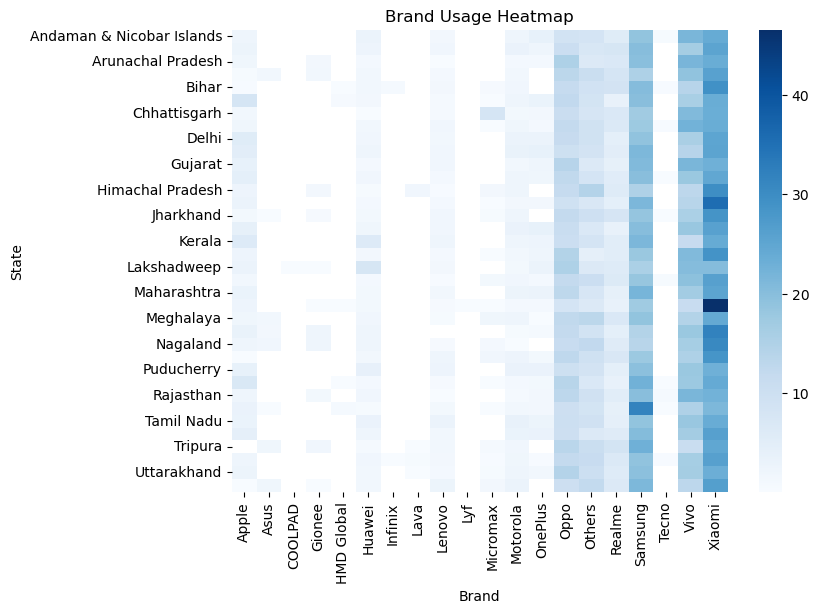

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(data_pivot, annot=False, cmap='Blues', fmt=".1f")
plt.title('Brand Usage Heatmap')
plt.show()

In [560]:
df = state_txn[state_txn['State'] == 'Uttar Pradesh']
df.head()

,State,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
476,Uttar Pradesh,2018,1,12537805,1.393997e+10,1111.835040,4694250,0
477,Uttar Pradesh,2018,2,17710943,2.572020e+10,1452.220906,6442554,0
478,Uttar Pradesh,2018,3,26515356,3.701211e+10,1395.874691,8096483,0
479,Uttar Pradesh,2018,4,36100767,5.509674e+10,1526.193158,10341964,0
480,Uttar Pradesh,2019,1,57324504,7.652418e+10,1334.929651,12458661,0


C:\Users\TULIKA\AppData\Local\Temp\ipykernel_24996\438872397.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



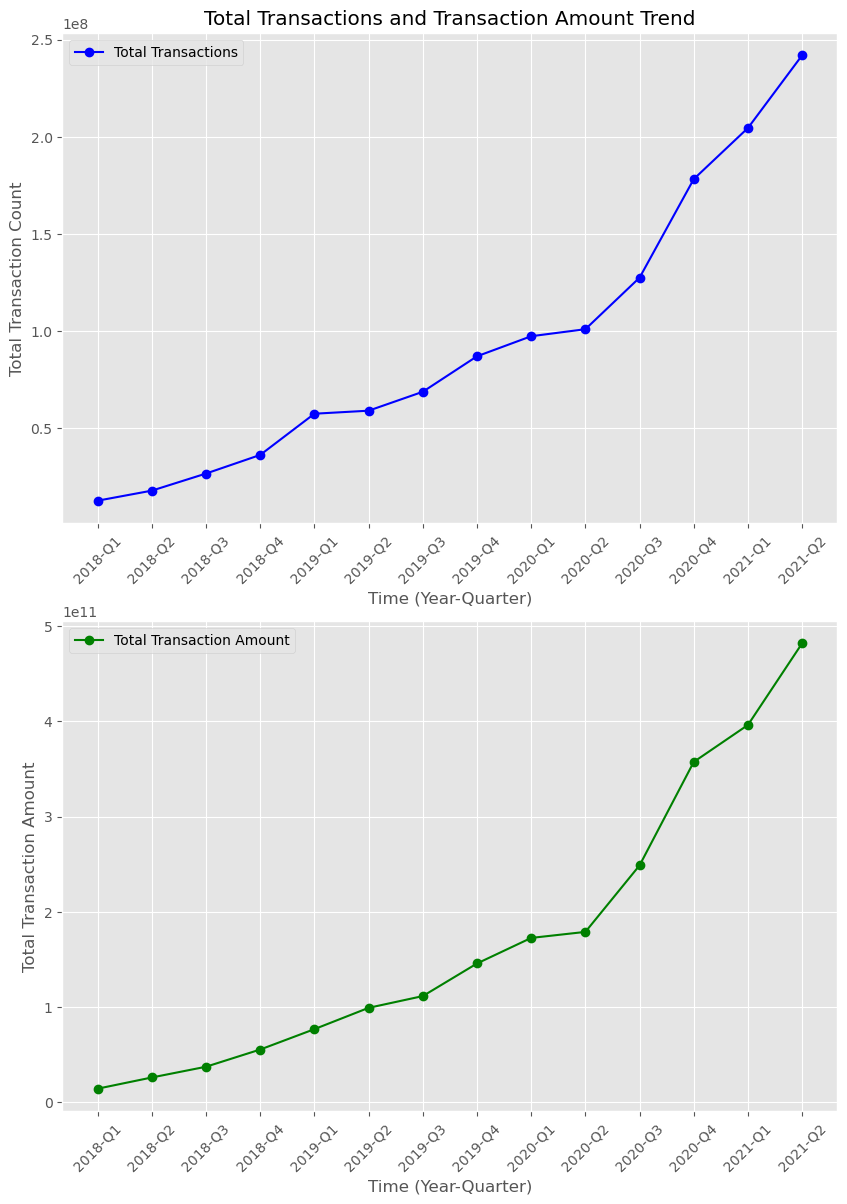

In [596]:
df['Time'] = df['Year'].astype(str) + '-Q' + df['Quarter'].astype(str)

plt.figure(figsize = (10,14))
plt.subplot(2,1,1)
plt.plot(df['Time'],df['Transactions'], marker='o', label='Total Transactions', color = 'blue')
plt.xlabel("Time (Year-Quarter)")
plt.ylabel("Total Transaction Count")
plt.title("Total Transactions and Transaction Amount Trend")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(df['Time'],df['Amount (INR)'], marker='o', label='Total Transaction Amount', color = 'green')
plt.xlabel("Time (Year-Quarter)")
plt.ylabel("Total Transaction Amount")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)
# Formatting


plt.show()

In [624]:
kerala_txn = state_txn_type[(state_txn_type['State']=='Kerala') & (state_txn_type['Year']==2018) & (state_txn_type['Quarter']==2)]

In [626]:
kerala_txn

,State,Year,Quarter,Transaction Type,Transactions,Amount (INR),ATV (INR)
1125,Kerala,2018,2,Recharge & bill payments,1230869,2.480801e+08,201.548778
1126,Kerala,2018,2,Peer-to-peer payments,848291,3.436200e+09,4050.732106
1127,Kerala,2018,2,Merchant payments,131217,1.445016e+08,1101.241318
1128,Kerala,2018,2,Financial Services,41100,1.235559e+07,300.622612
1129,Kerala,2018,2,Others,56688,4.578644e+07,807.691923


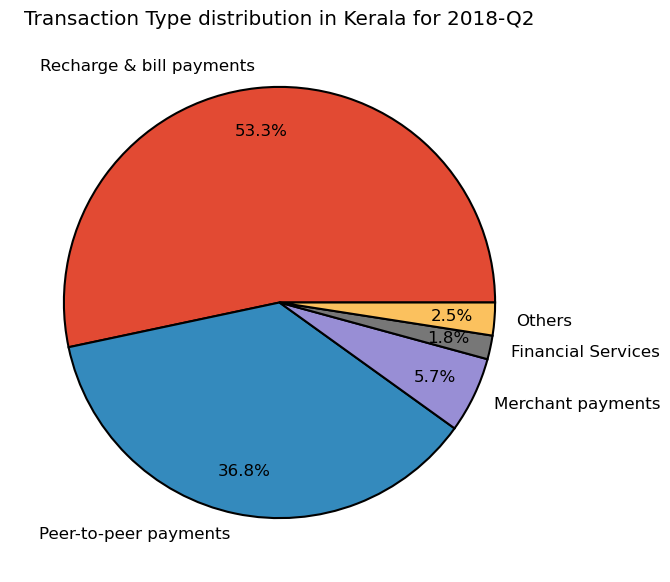

In [630]:
plt.style.use("ggplot")
plt.figure(figsize=(18,7))
plt.pie(kerala_txn['Transactions'], labels = kerala_txn['Transaction Type'], 
        autopct = '%1.1f%%',
        labeldistance=1.1, 
        pctdistance=0.8,
        textprops={'fontsize': 12},
        wedgeprops = {'edgecolor':'black', 'linewidth':1.5})
plt.title("Transaction Type distribution in Kerala for 2018-Q2")
plt.show()

C:\Users\TULIKA\AppData\Local\Temp\ipykernel_10656\951921740.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bihar_txn.sort_values(by='Density', ascending = False, inplace = True)


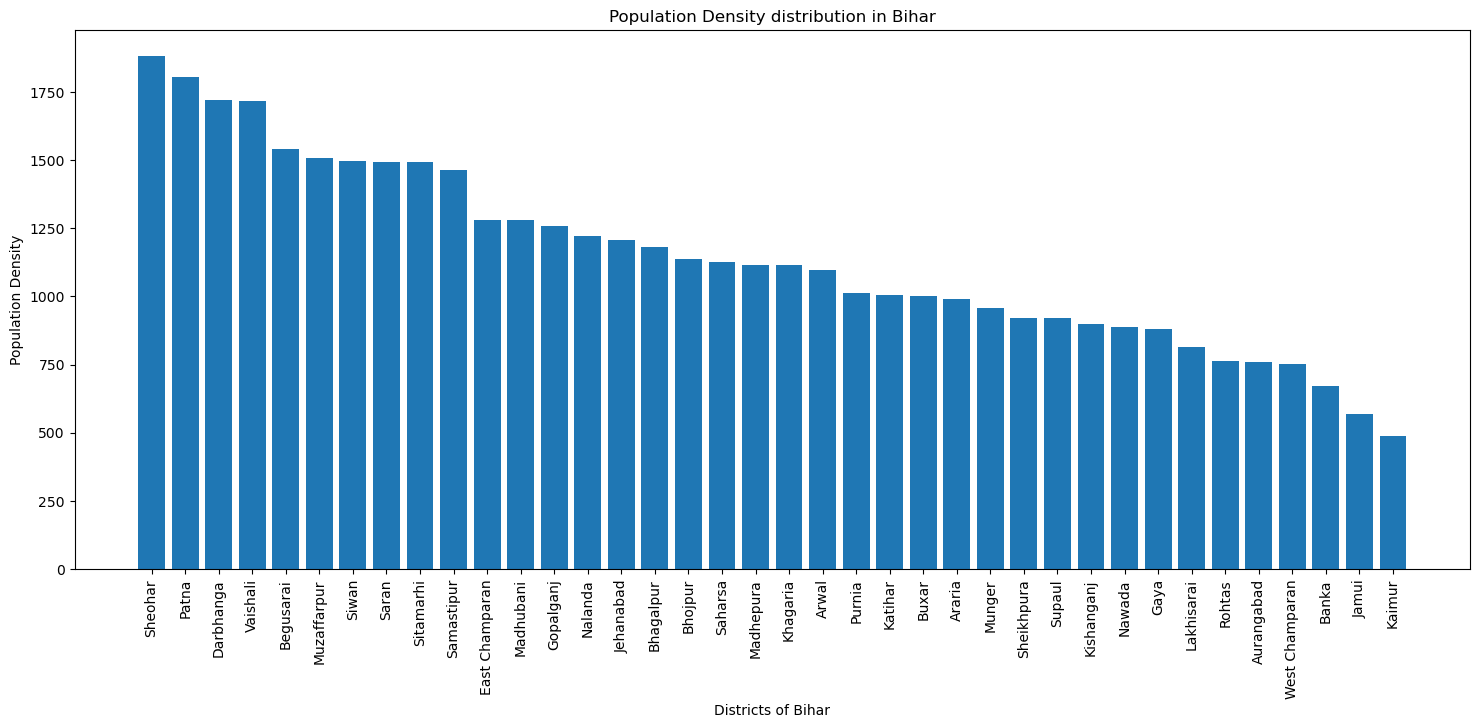

In [29]:
bihar_txn = district_demo[district_demo['State']=='Bihar']
bihar_txn.groupby('District').agg({'Density':'sum'})
bihar_txn.sort_values(by='Density', ascending = False, inplace = True)


plt.figure(figsize = (18,7))
plt.bar(bihar_txn['District'], bihar_txn['Density'])
plt.xlabel("Districts of Bihar")
plt.ylabel("Population Density")
plt.title('Population Density distribution in Bihar')
plt.xticks(rotation=90)
plt.show()